# Session 7 - Neural Networks for image data

In this notebook, we're going to see how we can train simple neural networks using ```TensorFlow```, a machine learning and deep learning framework developed by Google Research. You can find the documentation [here](https://www.tensorflow.org/).

We're still working on greyscale images at this point - next week, we'll start thinking about working with full colour images.

In [1]:
# generic tools
import numpy as np
import pandas as pd

# data loader
from tensorflow.keras.datasets import cifar10

# tools from sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# tools from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

# matplotlib
import matplotlib.pyplot as plt

2023-03-17 14:15:06.775114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Download data, train-test split

Loading cifar10 dataset and giving labels.

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ["airplane", 
          "automobile", 
          "bird", 
          "cat", 
          "deer", 
          "dog", 
          "frog", 
          "horse", 
          "ship", 
          "truck"]

# greyscale
X_train_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test_grey = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

# scaling
X_train_scaled = (X_train_grey)/255.0
X_test_scaled = (X_test_grey)/255.0

nsamples, nx, ny = X_train_scaled.shape
X_train_dataset = X_train_scaled.reshape((nsamples,nx*ny))
nsamples, nx, ny = X_test_scaled.shape
X_test_dataset = X_test_scaled.reshape((nsamples,nx*ny))

# split data
(X_train, X_test, y_train, y_test) = train_test_split(data,
                                                    labels, 
                                                    test_size=0.2)

AttributeError: module 'keras.api._v2.keras.datasets.cifar10' has no attribute 'astype'

In [3]:
# convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

## Define neural network architecture using ```tf.keras```

We're now going to create our neural network using ```TensorFlow```. In particular, we're going to using the ```keras``` wrapper which makes the syntax a bit simpler to work with.

The code below makes a fully-connected, feed-forward neural network with the following features:

- Input layer of 784
- One hidden layer of 256
- Second hidden layer of 128
- An output layer of 10 nodes

In [4]:
# define architecture 784x256x128x10 - sequential=feedforward
model = Sequential()
model.add(Dense(256, 
                input_shape=(784,), 
                activation="relu"))
model.add(Dense(128, 
                activation="relu"))
model.add(Dense(10, 
                activation="softmax"))

2023-03-17 13:47:40.228420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show summary of model architecture

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Visualise model layers

If you want to do view this, there are some extra things that you can install - ```TensorFlow``` gives you instructions to do that.

**NB:** This might not work on Windows (but I'm not sure).

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compile model loss function, optimizer, and preferred metrics

One of the big differences with ```TensorFlow``` vs ```scikit-learn``` is that we have much more control over how the optimization algorithm works.

We initalize the optimizer and then we have to *compile* the model.

In [6]:
# train model using SGD
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", 
              optimizer=sgd, 
              metrics=["accuracy"])

## Train model and save history

Once we've done that, it's just a case of fitting the model to the data.

In [7]:
history = model.fit(X_train, y_train,  
                    epochs=10, 
                    batch_size=32)

Epoch 1/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.5859 - accuracy: 0.8491
Epoch 2/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.2818 - accuracy: 0.9206
Epoch 3/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.2302 - accuracy: 0.9348
Epoch 4/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1962 - accuracy: 0.9443
Epoch 5/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1711 - accuracy: 0.9512
Epoch 6/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1522 - accuracy: 0.9560
Epoch 7/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1364 - accuracy: 0.9608
Epoch 8/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1233 - accuracy: 0.9652
Epoch 9/10
1750/1750 [==============================] - 12s 7ms/step - loss: 0.1124 - accuracy: 0.9679
Epoch 10/10
1750/1750 [==============================] - 12s 7ms/step - l

## Visualise using ```matplotlib```

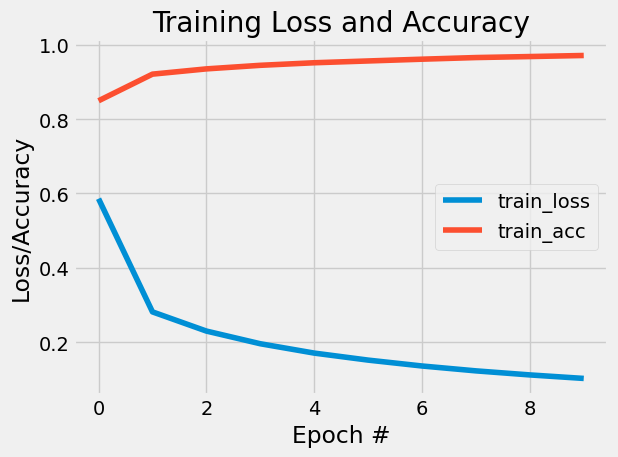

In [8]:
plt.style.use("fivethirtyeight")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss", linestyle=":")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc", linestyle=":")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

## Classifier metrics

We need to do a little bit of extra work to get the classification report to work properly.

In [10]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=32)

[INFO] evaluating network...
438/438 [==============================] - 1s 2ms/step


In [11]:
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1), 
                            target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1431
           1       0.97      0.99      0.98      1586
           2       0.96      0.97      0.97      1388
           3       0.96      0.95      0.95      1466
           4       0.97      0.96      0.96      1378
           5       0.96      0.95      0.95      1262
           6       0.96      0.98      0.97      1328
           7       0.98      0.96      0.97      1421
           8       0.94      0.96      0.95      1362
           9       0.96      0.96      0.96      1378

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



### Task

1. Turn the above into a ```.py``` script which can be run from the command line. Use argparse if you think it's relevant!
2. Use this notebook as a template to train a neural network on the ```Cifar-10``` dataset instead of ```MNIST```.
3. Turn *that* notebook into a ```.py``` script, too